In [ ]:
import pandas as pd
import numpy as np


Dataset from:

https://www.kaggle.com/datasets/pavellexyr/one-million-reddit-jokes


In [ ]:
# Import dataset
dataaa = pd.read_csv("one-million-reddit-jokes.csv")
dataaa.head(5)

# Most rows are useless


# 'type': the type of the data point. Can be 'post' or 'comment'. (ONLY POSTS)
# 'id': the base-36 Reddit ID of the data point. Unique when combined with type.
# 'subreddit.id': the base-36 Reddit ID of the data point's host subreddit. Unique.
# 'subreddit.name': the human-readable name of the data point's host subreddit. (ALL ARE "jokes")
# 'subreddit.nsfw': a boolean marking the data point's host subreddit as NSFW or not. (ALL ARE safe)
# 'created_utc': a UTC timestamp for the data point. ()
# 'permalink': a reference link to the data point on Reddit.
# 'score': score of the data point on Reddit.4
# 'domain': the domain of the data point's link. (ALL ARE SELF.JOKES)
# 'url': the destination of the data point's link, if any. (ALL ARE EMPTY)
# 'selftext': the self-text of the data point, if any.
# 'title': the title of the post data point.


,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,ftbp1i,2qh72,jokes,False,1585785543,https://old.reddit.com/r/Jokes/comments/ftbp1i...,self.jokes,NaN,My corona is covered with foreskin so it is no...,I am soooo glad I'm not circumcised!,2
1,post,ftboup,2qh72,jokes,False,1585785522,https://old.reddit.com/r/Jokes/comments/ftboup...,self.jokes,NaN,It's called Google Sheets.,Did you know Google now has a platform for rec...,9
2,post,ftbopj,2qh72,jokes,False,1585785508,https://old.reddit.com/r/Jokes/comments/ftbopj...,self.jokes,NaN,The vacuum doesn't snore after sex.\n\n&amp;#x...,What is the difference between my wife and my ...,15
3,post,ftbnxh,2qh72,jokes,False,1585785428,https://old.reddit.com/r/Jokes/comments/ftbnxh...,self.jokes,NaN,[removed],My last joke for now.,9
4,post,ftbjpg,2qh72,jokes,False,1585785009,https://old.reddit.com/r/Jokes/comments/ftbjpg...,self.jokes,NaN,[removed],The Nintendo 64 turns 18 this week...,134


In [ ]:
dataaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   type            1000000 non-null  object
 1   id              1000000 non-null  object
 2   subreddit.id    1000000 non-null  object
 3   subreddit.name  1000000 non-null  object
 4   subreddit.nsfw  1000000 non-null  bool  
 5   created_utc     1000000 non-null  int64 
 6   permalink       1000000 non-null  object
 7   domain          1000000 non-null  object
 8   url             4472 non-null     object
 9   selftext        995485 non-null   object
 10  title           1000000 non-null  object
 11  score           1000000 non-null  int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 84.9+ MB


In [ ]:
data = dataaa.copy()

In [ ]:
# Some title or selftext have been deleted or removed. We should get rid of those
data = data[~data["title"].isin(["[deleted]", "[removed]"])]
data = data[~data["selftext"].isin(["[deleted]", "[removed]"])]

In [ ]:
# Put title and selftext tpgether
data["text"] = data["title"].astype(str) + " " + data["selftext"].astype(str)
data.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score,text
0,post,ftbp1i,2qh72,jokes,False,1585785543,https://old.reddit.com/r/Jokes/comments/ftbp1i...,self.jokes,NaN,My corona is covered with foreskin so it is no...,I am soooo glad I'm not circumcised!,2,I am soooo glad I'm not circumcised! My corona...
1,post,ftboup,2qh72,jokes,False,1585785522,https://old.reddit.com/r/Jokes/comments/ftboup...,self.jokes,NaN,It's called Google Sheets.,Did you know Google now has a platform for rec...,9,Did you know Google now has a platform for rec...
2,post,ftbopj,2qh72,jokes,False,1585785508,https://old.reddit.com/r/Jokes/comments/ftbopj...,self.jokes,NaN,The vacuum doesn't snore after sex.\n\n&amp;#x...,What is the difference between my wife and my ...,15,What is the difference between my wife and my ...
7,post,ftbeb4,2qh72,jokes,False,1585784461,https://old.reddit.com/r/Jokes/comments/ftbeb4...,self.jokes,NaN,Oo..lala...,What did the French man say to the attractive ...,2,What did the French man say to the attractive ...
10,post,ftbahg,2qh72,jokes,False,1585784081,https://old.reddit.com/r/Jokes/comments/ftbahg...,self.jokes,NaN,"Yo momma's so fat, that when she went to the z...",Yo Mama,0,"Yo Mama Yo momma's so fat, that when she went ..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578634 entries, 0 to 999998
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   type            578634 non-null  object
 1   id              578634 non-null  object
 2   subreddit.id    578634 non-null  object
 3   subreddit.name  578634 non-null  object
 4   subreddit.nsfw  578634 non-null  bool  
 5   created_utc     578634 non-null  int64 
 6   permalink       578634 non-null  object
 7   domain          578634 non-null  object
 8   url             4471 non-null    object
 9   selftext        574120 non-null  object
 10  title           578634 non-null  object
 11  score           578634 non-null  int64 
 12  text            578634 non-null  object
dtypes: bool(1), int64(2), object(10)
memory usage: 57.9+ MB


In [ ]:
d = data[["text", "score"]] # Only these 2 columns are important
d.head(5)

,text,score
0,I am soooo glad I'm not circumcised! My corona...,2
1,Did you know Google now has a platform for rec...,9
2,What is the difference between my wife and my ...,15
7,What did the French man say to the attractive ...,2
10,"Yo Mama Yo momma's so fat, that when she went ...",0


In [ ]:
import re

In [ ]:
d = data[["text", "score"]].copy()

# Remove punctuation
d["text_preprocessed"] = d['text'].map(lambda x: re.sub(r"[,.!?]", '', x))

# Convert to lowercase
d['text_preprocessed'] = d['text_preprocessed'].map(lambda x: x.lower())

# Remove HTML artifacts like amp, amp;#x200B, x200b, nbsp, etc.
d["text_preprocessed"] = d["text_preprocessed"].str.replace(r"(amp;?|\#x200b|x200b|nbsp)", "", regex=True)



In [ ]:
# Print out the first rows
d['text_preprocessed'].head(20)

,text_preprocessed
0,i am soooo glad i'm not circumcised my corona ...
1,did you know google now has a platform for rec...
2,what is the difference between my wife and my ...
7,what did the french man say to the attractive ...
10,yo mama yo momma's so fat that when she went t...
11,why did the pilot turn his plane into pens pen...
12,on my 18th birthday my friend introduced me to...
13,which animal has the softest bite “gummy” bears
16,april fool because nothing is funny any more a...
18,want to know which user is gullible click here...


In [ ]:
# Stopword removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words) # Inspect stopwords

{'be', 'did', 'with', 'of', "you'll", "wouldn't", 'between', 'how', 'him', 'once', 'theirs', 'they', 'for', "shan't", 'am', 'more', 'my', 'as', "he'd", 'until', 'against', 'couldn', "haven't", 'doing', 'when', "couldn't", 'herself', "i'll", 're', 'haven', 'it', 'shan', 'but', 'if', "i've", "won't", 'at', 'why', 'further', 'to', 'i', "wasn't", 'y', 'below', "they'd", 'such', 'didn', 'too', 'had', 'on', 'does', 'doesn', 'himself', 'yours', 'while', 'or', 'hers', 'few', 'above', "i'm", 'which', 'can', 'after', 'an', 'wouldn', 'not', 'isn', 'yourselves', 'same', "she'd", 'before', 'your', "it's", 'was', "you're", "they'll", "hadn't", 'do', 'itself', "doesn't", 'm', 'don', 'll', 'myself', "aren't", 'in', 'through', "hasn't", 'ma', 'she', 'what', 'because', 'their', "he'll", 'them', 'being', "needn't", 'no', 's', 'these', "mightn't", 'he', "she's", 've', "that'll", 'those', 'during', "mustn't", 'its', 'wasn', 'here', 'will', 'ours', 'just', 't', 'very', "she'll", 'some', 'a', 'd', 'been', 'u

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(len(stop_words))

198


In [ ]:
# Removes stopwords
def remove_stopwords(text):
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)


In [ ]:
d["text_preprocessed_no_stopwords"] = d["text_preprocessed"].apply(remove_stopwords)
d["text_preprocessed_no_stopwords"].head(20)
# "french man say attractive teletubby oolala" is my favorite

,text_preprocessed_no_stopwords
0,soooo glad circumcised corona covered foreskin...
1,know google platform recording bowel movements...
2,difference wife vacuum vacuum snore sex &; apr...
7,french man say attractive teletubby oolala
10,yo mama yo momma's fat went zoo hippos got jea...
11,pilot turn plane pens pencils ruler refuel nee...
12,18th birthday friend introduced fit sister hap...
13,animal softest bite “gummy” bears
16,april fool nothing funny april fools day cance...
18,want know user gullible click find


In [ ]:
d['text_preprocessed'].iloc[13] # Manually inspecting weird texts

'this month starts with ap not sure if it will end with ril or opcalypse'

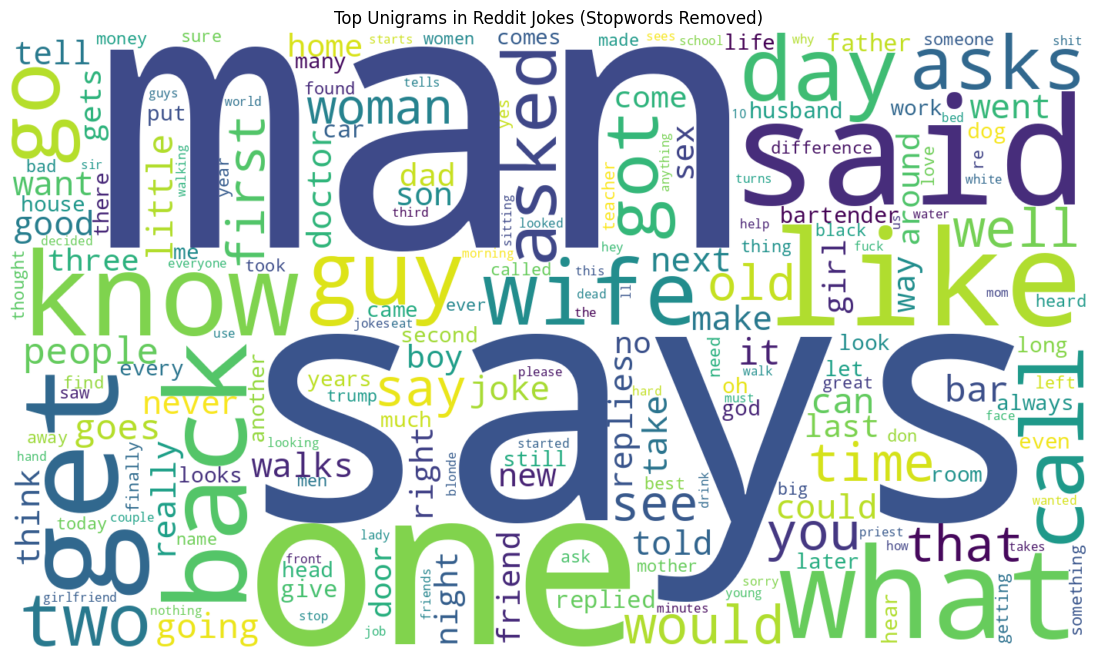

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the same texts list I already prepared
texts = d["text_preprocessed_no_stopwords"].dropna().tolist()

# Unigrams
vectorizer_uni = CountVectorizer(ngram_range=(1,1), min_df=20)
X_uni = vectorizer_uni.fit_transform(texts)

# Extract unigram frequencies
sum_words_uni = X_uni.sum(axis=0)
unigrams_freq = [
    (word, sum_words_uni[0, idx])
    for word, idx in vectorizer_uni.vocabulary_.items()
]

# Sort and pick top 500
unigrams_freq = sorted(unigrams_freq, key=lambda x: x[1], reverse=True)
unigram_dict = {uni: freq for (uni, freq) in unigrams_freq[:500]}

# Wordcloud
wc_unigram = WordCloud(width=1400, height=800, background_color="white")

plt.figure(figsize=(14, 8))
plt.imshow(wc_unigram.generate_from_frequencies(unigram_dict), interpolation="bilinear")
plt.axis("off")
plt.title("Top Unigrams in Reddit Jokes (Stopwords Removed)")
plt.show()


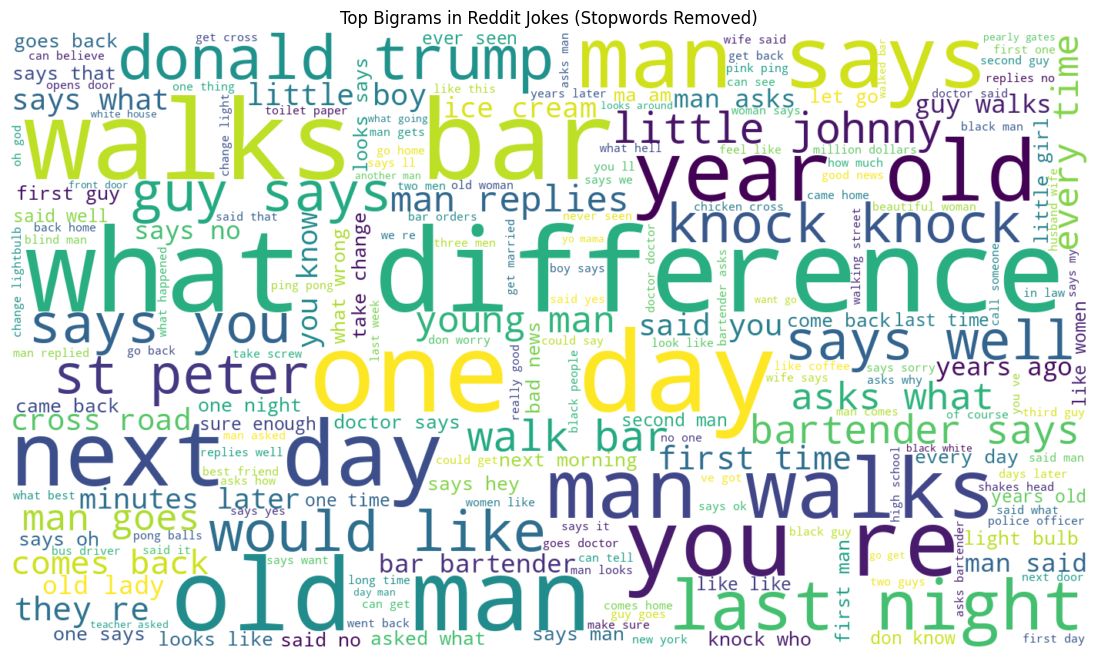

In [ ]:
texts = d["text_preprocessed_no_stopwords"].dropna().tolist()

# Bigrams
vectorizer_bi = CountVectorizer(ngram_range=(2,2), min_df=20)
X_bi = vectorizer_bi.fit_transform(texts)

# Extract bigram frequencies
sum_words_bi = X_bi.sum(axis=0)
bigrams_freq = [(word, sum_words_bi[0, idx])
                for word, idx in vectorizer_bi.vocabulary_.items()]
bigrams_freq = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)
bigram_dict = {bg: freq for (bg, freq) in bigrams_freq[:500]}


wc_bigram = WordCloud(width=1400, height=800, background_color="white")

plt.figure(figsize=(14,8))
plt.imshow(wc_bigram.generate_from_frequencies(bigram_dict), interpolation="bilinear")
plt.axis("off")
plt.title("Top Bigrams in Reddit Jokes (Stopwords Removed)")
plt.show()


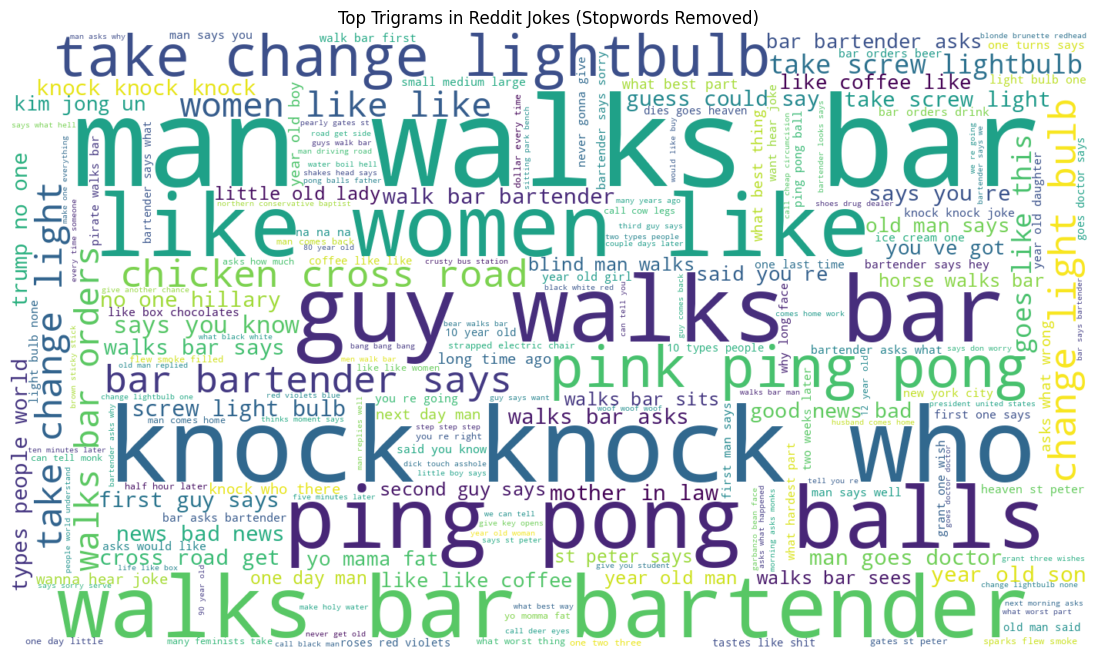

In [ ]:
# Trigrams
vectorizer_tri = CountVectorizer(ngram_range=(3,3), min_df=15)
X_tri = vectorizer_tri.fit_transform(texts)

sum_words_tri = X_tri.sum(axis=0)
trigrams_freq = [(word, sum_words_tri[0, idx])
                 for word, idx in vectorizer_tri.vocabulary_.items()]
trigrams_freq = sorted(trigrams_freq, key=lambda x: x[1], reverse=True)
trigram_dict = {tg: freq for (tg, freq) in trigrams_freq[:500]}


wc_trigram = WordCloud(width=1400, height=800, background_color="white")

plt.figure(figsize=(14,8))
plt.imshow(wc_trigram.generate_from_frequencies(trigram_dict), interpolation="bilinear")
plt.axis("off")
plt.title("Top Trigrams in Reddit Jokes (Stopwords Removed)")
plt.show()


In [ ]:
import spacy
# Remove stopwords

nlp = spacy.load("en_core_web_sm")

In [ ]:
def spacy_preprocess(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        # keep only alphabetic words
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_)
    return tokens


In [ ]:
d["tokens"] = d["text_preprocessed_no_stopwords"].apply(spacy_preprocess)
d.head()
# 106 minutes
# Now 116

In [ ]:
qqq = d.copy()

In [ ]:
d.describe()

In [ ]:
# Convert tokens into space-separated text. For vectorizer
# LDA requires text
d["token_text"] = d["tokens"].apply(lambda tokens: " ".join(tokens))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora.dictionary import Dictionary

# Vectorizer - bag of words
vectorizer = CountVectorizer(
    lowercase=False,
    min_df=5,
    max_df=0.4,
    ngram_range=(2,3) # Change to (2,3)
)

# X = vectorizer.fit_transform(d["token_text"])
# feature_names = vectorizer.get_feature_names_out()
# print("Vocabulary size:", len(feature_names))


X = vectorizer.fit_transform(d["token_text"])
feature_names = vectorizer.get_feature_names_out()

print("Vocabulary size:", len(feature_names))


In [ ]:
# from gensim.corpora.dictionary import Dictionary
# token_lists = d["tokens"].tolist()
# dictionary = Dictionary(token_lists)
# corpus = [dictionary.doc2bow(toks) for toks in token_lists]


from gensim.corpora.dictionary import Dictionary

analyzer = vectorizer.build_analyzer()

ngram_token_lists = [analyzer(text) for text in d["token_text"]]

dictionary = Dictionary(ngram_token_lists)
corpus = [dictionary.doc2bow(toks) for toks in ngram_token_lists]


In [ ]:
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel

# Coherence
def compute_coherence_sklearn_lda(model, feature_names, token_lists, topn=20):
    """Compute UMass coherence for a trained sklearn LDA model."""
    topics = []
    for topic_idx, topic_weights in enumerate(model.components_):
        top_indices = topic_weights.argsort()[-topn:]
        topics.append([feature_names[i] for i in top_indices])

    cm = CoherenceModel(
        topics=topics,
        texts=token_lists,
        dictionary=dictionary,
        corpus=corpus,
        coherence='c_v' # 'c_v' not anything else
    )
    return cm.get_coherence()

# Diversity
def compute_topic_diversity(model, feature_names, topn=25):
    topic_words = []
    for topic_weights in model.components_:
        top_indices = topic_weights.argsort()[-topn:]
        topic_words.extend([feature_names[i] for i in top_indices])
    unique_words = len(set(topic_words))
    total_words = len(topic_words)
    return unique_words / total_words



In [ ]:
k_values = [5, 10, 15, 20]
results = []

for k in k_values:
    print(f"Training LDA for K={k}.")

    lda = LatentDirichletAllocation(
        n_components=k,
        max_iter=15,
        learning_method='batch',
        random_state=42,
        evaluate_every=-1,
        n_jobs=-1
    )

    lda.fit(X)


    coherence = compute_coherence_sklearn_lda(lda, feature_names, ngram_token_lists, topn=25)

    perplexity = lda.perplexity(X)
    diversity = compute_topic_diversity(lda, feature_names, topn=25)

    results.append((k, coherence, perplexity, diversity, lda))
    print(f"  coherence={coherence:.4f}  perplexity={perplexity:.4f}  diversity={diversity:.4f}")

In [ ]:
X.shape

In [ ]:
X.nnz

In [ ]:
np.mean(np.diff(X.indptr))

In [ ]:
import pandas as pd

# Results in a DataFrame for better visual clarity
df_results = pd.DataFrame(
    [(k, coh, perp, div) for (k, coh, perp, div, lda) in results],
    columns=["K", "Coherence", "Perplexity", "TopicDiversity"]
)

display(df_results)


In [ ]:
# Displays top N (15) words
def print_top_words(model, feature_names, n_top_words=15):
    for topic_idx, topic_weights in enumerate(model.components_):
        top_indices = topic_weights.argsort()[-n_top_words:]
        top_terms = [feature_names[i] for i in top_indices]
        print(f"Topic {topic_idx}: {' | '.join(top_terms)}")



Print topics for K 5, 10, 15, 20.
Inspect.

In [ ]:
# Print topics for K = 5
model_k5 = [model for (k, coh, perp, div, model) in results if k == 5][0]
print("\n=== Topics for K=5 ===\n")
print_top_words(model_k5, feature_names)

In [ ]:
# Print topics for K = 10
model_k10 = [model for (k, coh, perp, div, model) in results if k == 10][0]
print("\n=== Topics for K=10 ===\n")
print_top_words(model_k10, feature_names)


In [ ]:
# Print topics for K = 15
model_k15 = [model for (k, coh, perp, div, model) in results if k == 15][0]
print("\n=== Topics for K=15 ===\n")
print_top_words(model_k15, feature_names)

In [ ]:
# Print topics for K = 20
model_k20 = [model for (k, coh, perp, div, model) in results if k == 20][0]
print("\n=== Topics for K=20 ===\n")
print_top_words(model_k20, feature_names)